In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams.update({'font.size': 25})

In [3]:
sales=pd.read_csv("../../data/sales/sales_sample2.csv",encoding='ms949')

## 데이터 탐색

In [4]:
sales.shape

(549415, 3)

In [6]:
sales.describe()

,주문품목 수량
count,549415.000000
mean,1.051045
std,0.852463
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,200.000000


In [8]:
sales.head(2)

,주문품목 수량,대분류,입금확인일(결제일)
0,1,티셔츠,2019-01-31 23:59
1,1,티셔츠,2019-01-31 23:59


In [9]:
sales['대분류'].value_counts()

티셔츠    387007
바지     112906
원피스     39317
신발      10185
Name: 대분류, dtype: int64

## Data Cleansing

*입금확인일 > 월별로 보기위해 월 추출

In [16]:
#결제일의 데이터타입 > 날짜 타입으로 변경
sales['입금확인일(결제일)'] = pd.to_datetime(sales['입금확인일(결제일)'])

In [17]:
sales['결제연도']=sales['입금확인일(결제일)'].dt.year
sales['결제월']=sales['입금확인일(결제일)'].dt.month

In [20]:
#2019년 밖에 없으므로, 월 컬럼만 사용 가능
sales['결제연도'].value_counts()

2019    549415
Name: 결제연도, dtype: int64

In [23]:
sales.head(2)

,주문품목 수량,대분류,입금확인일(결제일),결제연도,결제월
0,1,티셔츠,2019-01-31 23:59:00,2019,1
1,1,티셔츠,2019-01-31 23:59:00,2019,1


In [24]:
sales.tail(2)

,주문품목 수량,대분류,입금확인일(결제일),결제연도,결제월
549413,1,티셔츠,2019-12-02 10:01:00,2019,12
549414,1,티셔츠,2019-12-02 10:01:00,2019,12


## 월별 판매량 

In [27]:
sales.groupby(['결제월','대분류'])['주문품목 수량'].sum().unstack()

대분류,바지,신발,원피스,티셔츠
결제월,,,,
1,3617.0,520.0,2226.0,13246.0
2,3561.0,416.0,2039.0,12734.0
3,4013.0,843.0,2314.0,20811.0
4,8913.0,777.0,2523.0,32730.0
5,9845.0,NaN,NaN,59280.0
6,31236.0,1070.0,8180.0,59562.0
7,24488.0,1357.0,8762.0,74483.0
8,11523.0,NaN,4208.0,37088.0
9,4943.0,1052.0,4321.0,28519.0


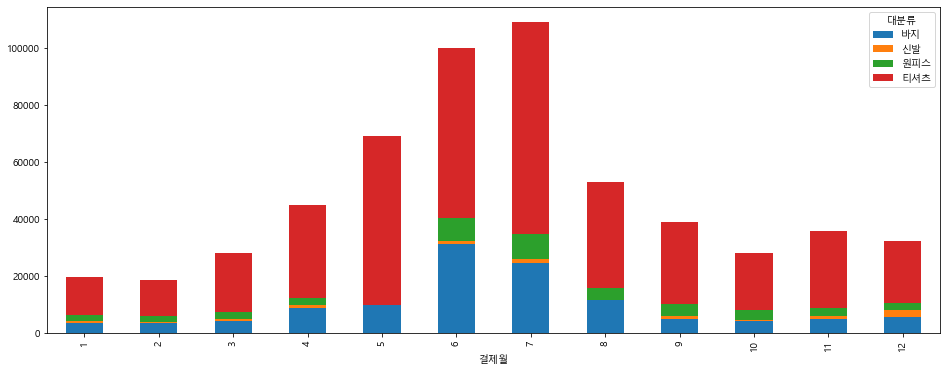

In [29]:
sales.groupby(['결제월','대분류'])['주문품목 수량'].sum().unstack().plot.bar(stacked=True,figsize=(16,6))

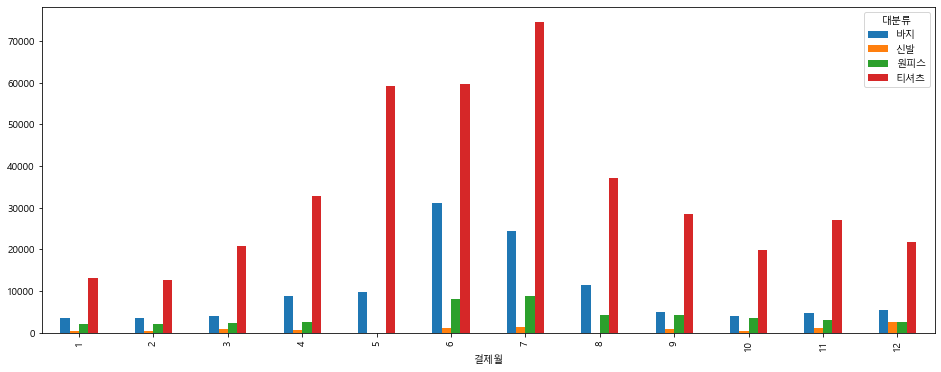

In [30]:
sales.groupby(['결제월','대분류'])['주문품목 수량'].sum().unstack().plot.bar(stacked=False,figsize=(16,6))